In [117]:
from helper import get_formatted_name, get_short_form_name
params = {
    'env_name':'FetchReach-v1',
    'alg':'ddpg',
    'exp_name':'AL74c',
    'obs_noise_std':0.0,
    'action_noise_std':0.0,
    'goal_radius':0.05,
    'rew_noise_std':5
}
run_path = '/home/gridsan/alagrassa/git/baselines/tune_run_results/'

name = get_formatted_name(params)
print(name)
import sys
sys.path.append("/home/gridsan/alagrassa/git/rl_plot/rl_plot")
import make_plots as mp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

ddpgFetchReach-v1AL74cobs_0.0act_0.0rw_0.05rew_noise_std_5


Excluded  _17-33-16fyalzs_2.npy because the data was too short at  0
Excluded  _14-18-32usgsovs7.npy because the data was too short at  0
Excluded  _14-18-33mpd08eyy.npy because the data was too short at  0


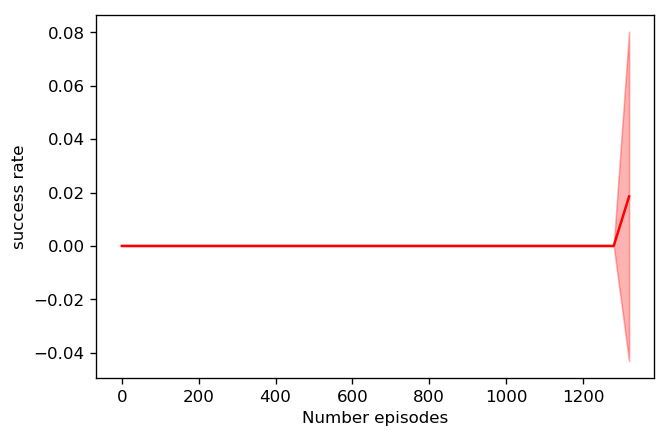

In [118]:
name = get_short_form_name(params)
eps_per_iter = 40
data_cutoff=1
smoothing=2
color = "r"
cutoff=None
mp.plot_family(run_path+name+"/", 
                       eps_per_iter=eps_per_iter, data_cutoff=data_cutoff, 
                       smoothing=smoothing, display=False, label="alg:ppo", 
                       color=color, cutoff=cutoff, ylab="success rate")

Text(0,0.5,'Last test success')

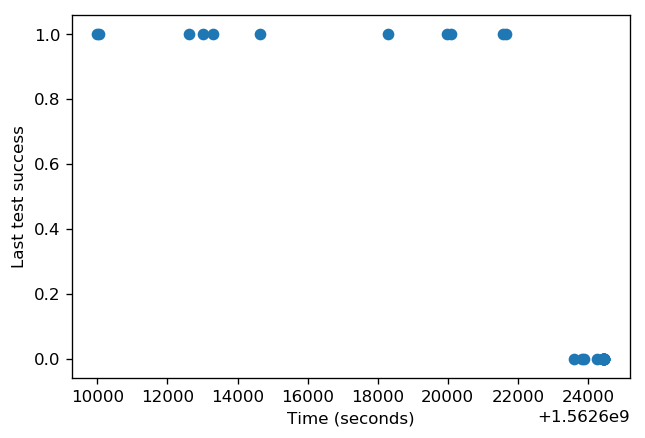

In [119]:
#plot results over time
import os
times = []
returns = []
for fn in os.listdir(run_path+name):
    if fn == "scan_files.py":
        continue
    full_fn = run_path+name+"/"+fn
    ctime = os.path.getctime(full_fn) #not actually creation time in Linux, don't be fooled
    times.append(ctime)
    
    rtn = np.load(full_fn)[-1]
    #if rtn > 0:
    #    print(full_fn)
    returns.append(rtn)

plt.scatter(times, returns)
plt.xlabel("Time (seconds)")
plt.ylabel("Last test success")